In [11]:
from FUCCIDataset import FUCCIDataset, ReferenceChannelDataset, FUCCIChannelDataset
import numpy as np
import torch
from kornia.utils import tensor_to_image
from FUCCIDataset import FUCCIDatasetInMemory, ReferenceChannelDatasetInMemory, FUCCIChannelDatasetInMemory
from LightningModules import FUCCIDataModule
from microfilm import microplot

In [13]:
FUCCI_PATH = '/home/ishang/implicit-cell-model/FUCCI-dev-data'
FUCCI_PATH = '/data/ishang/Fucci-dataset-v3_filtered/'
ds_og = ReferenceChannelDataset(FUCCI_PATH, imsize=256)
# ds = ReferenceChannelDatasetInMemory(FUCCI_PATH, imsize=256)
ds = ReferenceChannelDatasetInMemory(FUCCI_PATH, imsize=256)
print(ds.dataset_images.shape)
ds[0].shape
ds[20].shape
print(type(ds[0]))
print(type(ds_og[0]))
print(len(ds_og))

torch.Size([55777, 2, 256, 256])
<class 'torch.Tensor'>
<class 'torch.Tensor'>
55777


In [14]:
ct = 0
for i in range(len(ds_og)):
    print(ds[i].shape, ds_og[i].shape)
    if not torch.allclose(ds[i], ds_og[i]):
        print(i)
        ct += 1
print(ct)

RuntimeError: The size of tensor a (256) must match the size of tensor b (4) at non-singleton dimension 1

In [3]:
print(len(ds))

147


In [4]:
dm = FUCCIDataModule(data_dir=FUCCI_PATH, dataset="reference", batch_size=16, num_workers=32, imsize=1024)
dm_small = FUCCIDataModule(data_dir=FUCCI_PATH, dataset="reference", batch_size=16, num_workers=32, imsize=256)
train_data = dm.train_dataloader()
data_batch = next(iter(train_data))
data_batch_small = next(iter(dm_small.train_dataloader()))

(2, 256, 256)


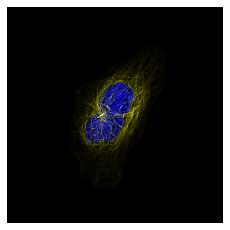

In [5]:
torch.max(data_batch[0, 1, :, :])
cmap = ['pure_blue', 'pure_yellow', 'pure_green', 'pure_red']
img = np.moveaxis(tensor_to_image(data_batch[0]), -1, 0)
print(img.shape)
microplot.microshow(images=img, cmaps=cmap[:2])

(2, 256, 256)
(2, 256, 256)


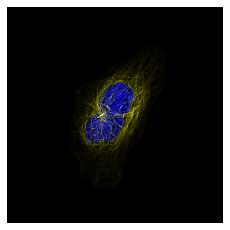

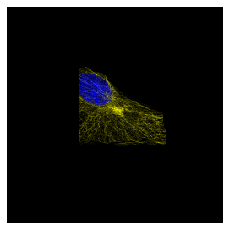

In [6]:
img_small = np.moveaxis(tensor_to_image(data_batch_small[0]), -1, 0)
img_1024 = microplot.microshow(images=img, cmaps=cmap[:2])
img_256 = microplot.microshow(images=img_small, cmaps=cmap[:2])
img_1024.savefig("sample_ref_1024.png")
img_256.savefig("sample_ref_256.png")
print(img.shape)
print(img_small.shape)

In [7]:
# import imageio as iio

# iio.imwrite("sample_ref_nuclei_256.png", img_small[0])
# iio.imwrite("sample_ref_microtubule_256.png", img_small[1])
# iio.imwrite("sample_ref_nuclei_1024.png", img[0])
# iio.imwrite("sample_ref_microtubule_1024.png", img[1])

from PIL import Image
Image.fromarray(img_small[0]).convert("I").save("sample_ref_nuclei_256.png")
Image.fromarray(img_small[1]).convert("I").save("sample_ref_microtubule_256.png")
Image.fromarray(img[0]).convert("I").save("sample_ref_nuclei_1024.png")
Image.fromarray(img[1]).convert("I").save("sample_ref_microtubule_1024.png")